In [13]:
from pathlib import Path
import pandas as pd
from bids import BIDSLayout
from joblib import Parallel, delayed
import nilearn
from nilearn import datasets, image, plotting, input_data
from nilearn.masking import apply_mask
from nilearn.image import resample_to_img
from nilearn.image import concat_imgs, index_img
import numpy as np
import matplotlib.pylab as plt
import os

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [22]:
dat_paths = pd.read_csv('/data/MBDU/midla/notebooks/campcc/dat_paths_rest.csv')
dat_paths

,confounds_path,image_path,mask_path,run,scaled_path,session,subject,task
0,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-20900/ses-01/run-1/out/out/fitlins/sub-20900/ses-01/sub-20900_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-01/func/sub-20900_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/anat/sub-20900_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-01/func/sub-20900_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,1,20900,rest
1,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-20900/ses-04/run-1/out/out/fitlins/sub-20900/ses-04/sub-20900_ses-04_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-04/func/sub-20900_ses-04_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/anat/sub-20900_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-04/func/sub-20900_ses-04_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,4,20900,rest
2,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21111/ses-01/run-1/out/out/fitlins/sub-21111/ses-01/sub-21111_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21111/out/fmriprep/sub-21111/ses-01/func/sub-21111_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21111/out/fmriprep/sub-21111/anat/sub-21111_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21111/out/fmriprep/sub-21111/ses-01/func/sub-21111_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,1,21111,rest
3,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21669/ses-01/run-1/out/out/fitlins/sub-21669/ses-01/sub-21669_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21669/out/fmriprep/sub-21669/ses-01/func/sub-21669_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21669/out/fmriprep/sub-21669/anat/sub-21669_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21669/out/fmriprep/sub-21669/ses-01/func/sub-21669_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,1,21669,rest
4,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21723/ses-01/run-1/out/out/fitlins/sub-21723/ses-01/sub-21723_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21723/out/fmriprep/sub-21723/ses-01/func/sub-21723_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21723/out/fmriprep/sub-21723/anat/sub-21723_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21723/out/fmriprep/sub-21723/ses-01/func/sub-21723_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,1,21723,rest
5,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21748/ses-01/run-1/out/out/fitlins/sub-21748/ses-01/sub-21748_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/da

In [8]:
project_root = Path('/data/MBDU/midla')
bids_dir = project_root / 'data/bids'
derivatives_dir = project_root / 'data/derivatives'
fmriprep_run_name = 'rn_aroma_20190910_2mm_rest'
fmriprep_out = derivatives_dir / 'fmriprep' / fmriprep_run_name
fitlins_run_name = 'rest_dm_only'
fitlins_out = derivatives_dir / 'fitlins' / fitlins_run_name

In [7]:
# the following command takes about 30 minutes
layout = BIDSLayout(bids_dir, derivatives=fmriprep_out)

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/bids/layout/layout.py:546: UserWarning: Derivative indexing was requested, but no valid datasets were found in the specified locations ([PosixPath('/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest')]). Note that all BIDS-Derivatives datasets must meet all the requirements for BIDS-Raw datasets (a common problem is to fail to include a dataset_description.json file in derivatives datasets).
  "datasets).".format(paths))


In [9]:
subjects = layout.get_subjects()
sessions = layout.get_sessions()
runs = layout.get_runs()

In [16]:
space='MNI152NLin2009cAsym'
task='rest'
echo='2'
verbose=True

cfd_pattern = 'sub-{subject}/ses-{session}/run-{run}/out/out/fitlins/sub-{subject}/ses-{session}/sub-{subject}_ses-{session}_task-{task}_run-{run}_design.{extension}'
img_pattern = 'sub-{subject}/out/fmriprep/sub-{subject}/ses-{session}/func/sub-{subject}_ses-{session}_task-{task}_run-{run}_echo-{echo}_space-{space}_desc-{desc}_{suffix}.{extension}'
gm_mask_pattern = 'sub-{subject}/out/fmriprep/sub-{subject}/anat/sub-{subject}_space-{space}_label-GM_probseg.{extension}'
dat_paths = []
for subj in subjects:
    if verbose:
        print(subj, end=', ')
    for ses in sessions:
        for rn in runs:
            run_ents = dict(subject=subj, 
                        session=ses,
                        run=rn,
                        task=task)
            try:
                cfd_ents = run_ents.copy()
                cfd_ents.update({'extension':'tsv'})
                cfd_file = fitlins_out / layout.build_path(cfd_ents,cfd_pattern)
                if not cfd_file.exists():
                    raise FileNotFoundError(cfd_file.as_posix())

                img_ents = run_ents.copy()
                img_ents.update({'desc':'preproc', 'suffix':'bold', 'extension':'nii.gz', 'space':space, 'echo':echo})
                img_file = fmriprep_out / layout.build_path(img_ents,img_pattern)
                if not img_file.exists():
                    raise FileNotFoundError(img_file.as_posix())

                scl_ents = run_ents.copy()
                scl_ents.update({'desc':'scale', 'suffix':'bold', 'extension':'nii.gz', 'space':space, 'echo':echo})
                scl_file = fmriprep_out / layout.build_path(scl_ents,img_pattern)
                if not scl_file.exists():
                    raise FileNotFoundError(scl_file.as_posix())

                mask_ents = run_ents.copy()
                mask_ents.update({'extension':'nii.gz', 'space':space})
                mask_file = fmriprep_out / layout.build_path(mask_ents,gm_mask_pattern)
                if not mask_file.exists():
                    raise FileNotFoundError(mask_file.as_posix())

                run_ents['confounds_path'] = cfd_file.as_posix()
                run_ents['image_path'] = img_file.as_posix()
                run_ents['scaled_path'] = scl_file.as_posix()
                run_ents['mask_path'] = mask_file.as_posix()

                dat_paths.append(run_ents)

            except FileNotFoundError:
                pass

dat_paths = pd.DataFrame(dat_paths)

20900, 21111, 21669, 21723, 21748, 22127, 22228, 22279, 22293, 22409, 22477, 22686, 22698, 22699, 22749, 22812, 22892, 23015, 23017, 23108, 23199, 23298, 23303, 23399, 23428, 23457, 23458, 23490, 23495, 23502, 23513, 23516, 23519, 23520, 23528, 23540, 23544, 23546, 23549, 23550, 23553, 23554, 23557, 23564, 23565, 23574, 23576, 23593, 23595, 23607, 23611, 23613, 23614, 23625, 23638, 23639, 23641, 23643, 23644, 23649, 23652, 23656, 23660, 23668, 23672, 23673, 23674, 23689, 23693, 23717, 23718, 23720, 23732, 23745, 23746, 23748, 23753, 23757, 23759, 23765, 23766, 23767, 23770, 23772, 23777, 23780, 23783, 23798, 23809, 23810, 23813, 23814, 23817, 23820, 23823, 23824, 23825, 23830, 23834, 23843, 23848, 23849, 23850, 23852, 23856, 23857, 23859, 23866, 23867, 23880, 23886, 23890, 23895, 23896, 23900, 23901, 23903, 23905, 23906, 23907, 23911, 23912, 23919, 23924, 23927, 23935, 23937, 23943, 23951, 23952, 23957, 23962, 23969, 23980, 23988, 23999, 24014, 24028, 24036, 24043, 24047, 24048, 24052,

In [18]:
#from nilearn import datasets
#this data is overwritten by the joint atlas
msdl_data = datasets.fetch_atlas_msdl()
msdl_coords = msdl_data.region_coords
n_regions = len(msdl_coords)
print('MSDL has {0} ROIs, part of the following networks :\n{1}.'.format(
    n_regions, msdl_data.networks))
mdd_dataset = dat_paths
func_filenames = dat_paths['image_path'].tolist() #list of 4D nifti files for each subject

#confounds_file = pd.read_csv('design_paths_nobutton_extras_nobsl_reml_2mm_strict.csv')
#confounds=confounds_file['design_path'].tolist()

MSDL has 39 ROIs, part of the following networks :
[b'Aud', b'Aud', b'Striate', b'DMN', b'DMN', b'DMN', b'DMN', b'Occ post', b'Motor', b'R V Att', b'R V Att', b'R V Att', b'R V Att', b'Basal', b'L V Att', b'L V Att', b'L V Att', b'D Att', b'D Att', b'Vis Sec', b'Vis Sec', b'Vis Sec', b'Salience', b'Salience', b'Salience', b'Temporal', b'Temporal', b'Language', b'Language', b'Language', b'Language', b'Language', b'Cereb', b'Dors PCC', b'Cing-Ins', b'Cing-Ins', b'Cing-Ins', b'Ant IPS', b'Ant IPS'].


/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [19]:
confounds=dat_paths['confounds_path']
masks=dat_paths['mask_path']

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/nilearn/plotting/displays.py:98: UserWarning: No contour levels were found within the data range.
  **kwargs)


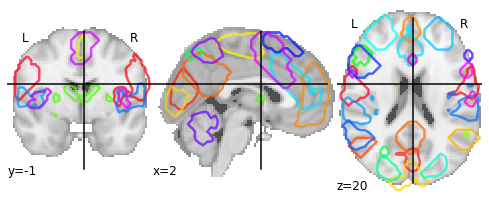

In [20]:
from nilearn.regions import connected_label_regions
#from nilearn import plotting
plotting.plot_prob_atlas(msdl_data.maps)

In [21]:
assert dat_paths.mask_path.isnull().sum() == 0
assert dat_paths.image_path.isnull().sum() == 0

In [22]:
dat_paths['masked_data'] = dat_paths.apply(lambda row: apply_mask(row.image_path, row.mask_path), axis=1)

ValueError: ('Given mask is not made of 2 values: [0.0000000e+00 7.5494114e-40 8.8734731e-39 ... 9.1882414e-01 9.1898781e-01\n 9.1900688e-01]. Cannot interpret as true or false', 'occurred at index 0')

In [24]:
dat_paths

,confounds_path,image_path,mask_path,run,scaled_path,session,subject,task
0,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-20900/ses-01/run-1/out/out/fitlins/sub-20900/ses-01/sub-20900_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-01/func/sub-20900_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/anat/sub-20900_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-01/func/sub-20900_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,01,20900,rest
1,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-20900/ses-04/run-1/out/out/fitlins/sub-20900/ses-04/sub-20900_ses-04_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-04/func/sub-20900_ses-04_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/anat/sub-20900_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-20900/out/fmriprep/sub-20900/ses-04/func/sub-20900_ses-04_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,04,20900,rest
2,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21111/ses-01/run-1/out/out/fitlins/sub-21111/ses-01/sub-21111_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21111/out/fmriprep/sub-21111/ses-01/func/sub-21111_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21111/out/fmriprep/sub-21111/anat/sub-21111_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21111/out/fmriprep/sub-21111/ses-01/func/sub-21111_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,01,21111,rest
3,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21669/ses-01/run-1/out/out/fitlins/sub-21669/ses-01/sub-21669_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21669/out/fmriprep/sub-21669/ses-01/func/sub-21669_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21669/out/fmriprep/sub-21669/anat/sub-21669_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21669/out/fmriprep/sub-21669/ses-01/func/sub-21669_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,01,21669,rest
4,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21723/ses-01/run-1/out/out/fitlins/sub-21723/ses-01/sub-21723_ses-01_task-rest_run-1_design.tsv,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21723/out/fmriprep/sub-21723/ses-01/func/sub-21723_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21723/out/fmriprep/sub-21723/anat/sub-21723_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz,1,/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm_rest/sub-21723/out/fmriprep/sub-21723/ses-01/func/sub-21723_ses-01_task-rest_run-1_echo-2_space-MNI152NLin2009cAsym_desc-scale_bold.nii.gz,01,21723,rest
5,/data/MBDU/midla/data/derivatives/fitlins/rest_dm_only/sub-21748/ses-01/run-1/out/out/fitlins/sub-21748/ses-01/sub-21748_ses-01_task-rest_run-1_design.tsv,/data/MBDU/mid

In [25]:
row = dat_paths.iloc[0, :]
img = image.load_img(row.scaled_path)
mask_img = resample_to_img(image.load_img(row.mask_path),img)
try:
    del html_view
except NameError:
    pass
html_view = plotting.view_img(mask_img)
html_view

In [26]:
img = image.load_img(row.scaled_path)
mask_img = resample_to_img(image.load_img(row.mask_path),img)

gm_dat = mask_img.get_fdata()[:,:,:,np.newaxis] * img.get_fdata()
gm_img = image.new_img_like(img, gm_dat, affine=img.affine, copy_header=True)

In [27]:
#Grey matter masking

masked_data = apply_mask(func_filenames,mask_paths)

NameError: name 'mask_paths' is not defined

In [30]:
#msdl = regions_extracted_img
hox = datasets.fetch_atlas_harvard_oxford('sub-prob-2mm')
print(hox.labels)
print(msdl.shape)

['Background', 'Left Cerebral White Matter', 'Left Cerebral Cortex ', 'Left Lateral Ventrical', 'Left Thalamus', 'Left Caudate', 'Left Putamen', 'Left Pallidum', 'Brain-Stem', 'Left Hippocampus', 'Left Amygdala', 'Left Accumbens', 'Right Cerebral White Matter', 'Right Cerebral Cortex ', 'Right Lateral Ventricle', 'Right Thalamus', 'Right Caudate', 'Right Putamen', 'Right Pallidum', 'Right Hippocampus', 'Right Amygdala', 'Right Accumbens']


NameError: name 'msdl' is not defined

(91, 109, 91, 10)


/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/numpy/ma/core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


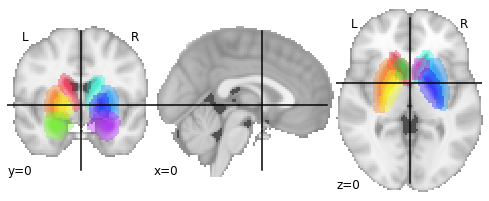

In [31]:
#Need nodes 4,5,6,9,10,15,16,17,19,20

hox_nodes = image.index_img(hox.maps, [4,5,6,9,10,15,16,17,19,20])
print(hox_nodes.shape)
display = plotting.plot_prob_atlas(hox_nodes,cut_coords=(0,0,0))

In [34]:
#Resampling hox and msdl to img size
img=image.load_img(row.scaled_path)
hox_data = hox_nodes.get_fdata() / 100
hox_nodes_scale = image.new_img_like(hox_nodes, hox_data, affine=hox_nodes.affine, copy_header=True)
resample_hox = resample_to_img(hox_nodes_scale,img, interpolation="nearest")
resample_msdl = resample_to_img(msdl_data.maps,img, interpolation="nearest")
print(resample_hox.shape)
print(resample_msdl.shape)
print(img.shape)

(97, 115, 97, 10)
(97, 115, 97, 39)
(97, 115, 97, 196)


/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/nilearn/plotting/displays.py:98: UserWarning: No contour levels were found within the data range.
  **kwargs)


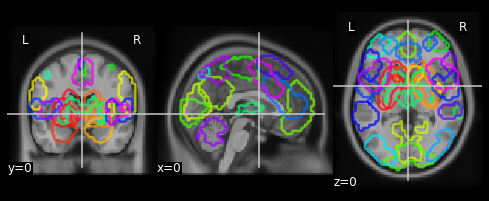

In [35]:
joint_atlas = concat_imgs([resample_hox,resample_msdl])
display = plotting.plot_prob_atlas(joint_atlas,cut_coords=(0,0,0),bg_img='/data/MBDU/midla/data/templates/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz')

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/numpy/ma/core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/nilearn/plotting/displays.py:98: UserWarning: linewidths is ignored by contourf
  **kwargs)


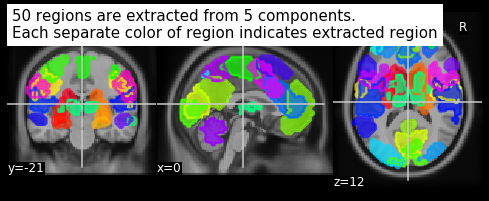

In [36]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(joint_atlas, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 5))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title,bg_img='/data/MBDU/midla/data/templates/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz')


In [381]:
regions_extracted_img.to_filename('hox_msdl_atlas.nii.gz')

In [37]:
#Defining masker object
#Set TR, do not detrend if cosine regressors already present

masker = input_data.NiftiMapsMasker(
    regions_extracted_img, resampling_target="data", t_r=2, detrend=False,
    low_pass=.1, high_pass=.01, memory='nilearn_cache', memory_level=1)

In [ ]:
regions_extracted_img

In [50]:
#Function: takes in row and masker object
#Returns image masked by grey matter, confounds, and transformed to atlas masker
def gm_weight_and_mask(row, regions_extracted_img, n_dummy=4, min_trs=100, **kwargs):
    img = image.load_img(row.scaled_path)
    if img.get_fdata().shape[-1] < min_trs:
        return None
    # load subjects grey matter mask
    mask_img = resample_to_img(image.load_img(row.mask_path),img)
    mask_dat = mask_img.get_fdata()[:,:,:,np.newaxis]
    
    # make a binary grey matter mask
    mask_bin = mask_dat > 0
    
    # mask the regions image by the subject grey matter
    regions_masked_dat = regions_extracted_img.get_fdata() * mask_bin
    regions_masked_img = image.new_img_like(regions_extracted_img, 
                                            regions_masked_dat, 
                                            affine=regions_extracted_img.affine, 
                                            copy_header=True)
    
    # create a new masker instance
    masker = input_data.NiftiMapsMasker(
        regions_masked_img, resampling_target="data", **kwargs)
    
    # apply the grey matter mask to the image data
    gm_dat = mask_dat * img.get_fdata()
    gm_img = image.new_img_like(img, gm_dat, affine=img.affine, copy_header=True)
    
    # Load confounds and remove drift columns if present
    try:
        cfds = pd.read_csv(row.confounds_path, sep='\t')
        cfds = cfds.loc[:, cfds.columns.values[~cfds.columns.str.contains('drift')]]
        return masker.fit_transform(gm_img, cfds.values)[n_dummy:, :]
    except AttributeError:
         return masker.fit_transform(gm_img)[n_dummy:, :]
    

In [51]:
rs_subjects = Parallel(n_jobs=10, verbose=10)(delayed(gm_weight_and_mask)(row,regions_extracted_img, t_r=2, detrend=False,
    low_pass=.1, high_pass=.01, memory='nilearn_cache', memory_level=1) for _, row in dat_paths.iterrows())

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  5.3min
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:  6.9min
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:  8.6min
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed: 11.6min
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed: 13.3min
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed: 16.0min
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed: 18.1min
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed: 21.0min
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed: 22.8min
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed: 25.9min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 28.9min
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed: 3

In [112]:
none_inds = []
good_inds = []
for i,x in enumerate(rs_subjects):
    if x is None:
        none_inds.append(i)
    else:
        good_inds.append(i)

In [114]:
dat_paths.loc[good_inds, ['subject', 'session', 'run']]

,subject,session,run
0,20900,01,1
1,20900,04,1
2,21111,01,1
3,21669,01,1
4,21723,01,1
5,21748,01,1
6,21748,02,1
7,21748,03,1
8,22127,01,1
9,22228,01,1


In [117]:
np.array(good_inds)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 18

In [120]:
rs_good = np.array(rs_subjects)[np.array(good_inds)]

In [121]:
# First we need to do subjects timeseries signals extraction and then estimating
# correlation matrices on those signals.
# To extract timeseries signals, we call transform() from RegionExtractor object
# onto each subject functional data stored in func_filenames.
# To estimate correlation matrices we import connectome utilities from nilearn
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(rs_good)
# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of RS Networks are stacked in an array of shape {0}'
      .format(correlation_matrices.shape))
mean_correlation_matrix = correlation_measure.mean_
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=regions_extracted_img)
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix.shape))

Correlations of RS Networks are stacked in an array of shape (425, 50, 50)
Mean correlation has shape (50, 50).


In [137]:
#load matrix plotting information
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)

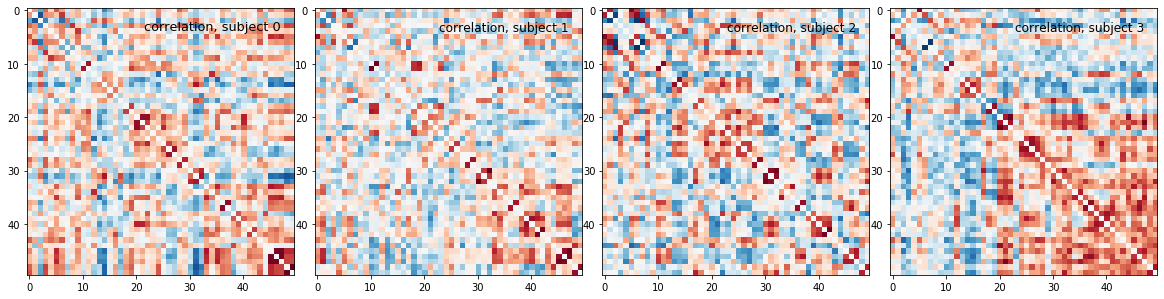

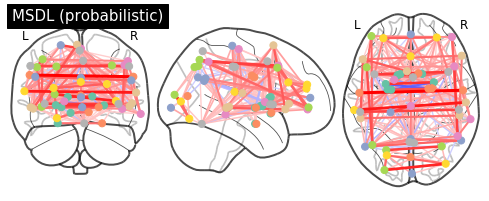

In [138]:
from nilearn import plotting

plot_matrices(correlation_matrices[:4], 'correlation')
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%", title='MSDL (probabilistic)')

In [122]:
#Calculate upper triangle indices without diagonal
#Load label data
#Append 
upper_indices = np.triu_indices(correlation_matrices.shape[-1], k=1)
correlation_matrices[:, upper_indices[0], upper_indices[1]].shape
label_data = pd.read_csv('/data/MBDU/midla/notebooks/campcc/atlas_labels.csv', header=None).values.tolist()

joined_labels = []
for ii, il in enumerate(label_data):
    for jj, jl in enumerate(label_data[(ii+1):]):
        joined_labels.append(f'{il[0]}__{jl[0]}')
cor_df = pd.DataFrame(correlation_matrices[:, upper_indices[0], upper_indices[1]], columns=joined_labels)

In [132]:
subj_cor_df = pd.concat([dat_paths.loc[good_inds, ['subject', 'session', 'run']].reset_index(),cor_df],axis=1)
assert len(subj_cor_df) == len(cor_df)

In [134]:
subj_cor_df.to_csv('/data/MBDU/midla/notebooks/campcc/output_data/rest_upper_func_corr_matrix_10162019.csv')

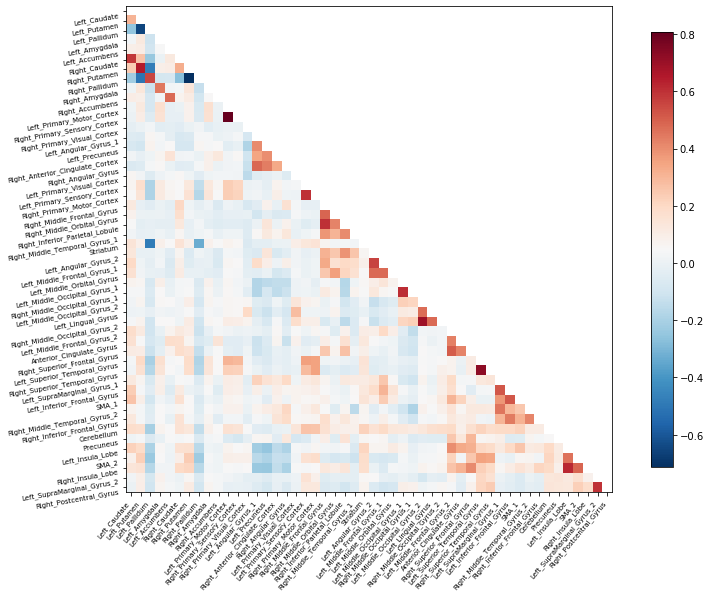

In [135]:
label_data = pd.read_csv('/data/MBDU/midla/notebooks/campcc/atlas_labels.csv', header=None).values.tolist()
labels = []
for x in label_data:
    labels.append(x[0])
upper_matrices = np.triu(correlation_matrices[0:len(correlation_matrices)],k=1)
plotting.plot_matrix(mean_correlation_matrix,labels=labels,tri='lower',figure=(10,10))

In [546]:
flat_matrix = []
for x in range(len(upper_matrices)):
    flat_matrix.extend(['subject','run','task'])
    flat_matrix.extend(upper_matrices[x].flatten())

#flat_matrix = np.concatenate(flat_matrix[0:len(flat_matrix)],axis=0)
pd.DataFrame(flat_matrix).to_csv('/data/MBDU/midla/notebooks/campcc/output_data/task_upper_flat_func_corr_matrix_10152019')

In [547]:
len(flat_matrix)

1101320

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/nilearn/connectome/connectivity_matrices.py:192: UserWarning: Maximum number of iterations 30 reached without getting to the requested tolerance level 1e-07.
  "{1}.".format(max_iter, tol))


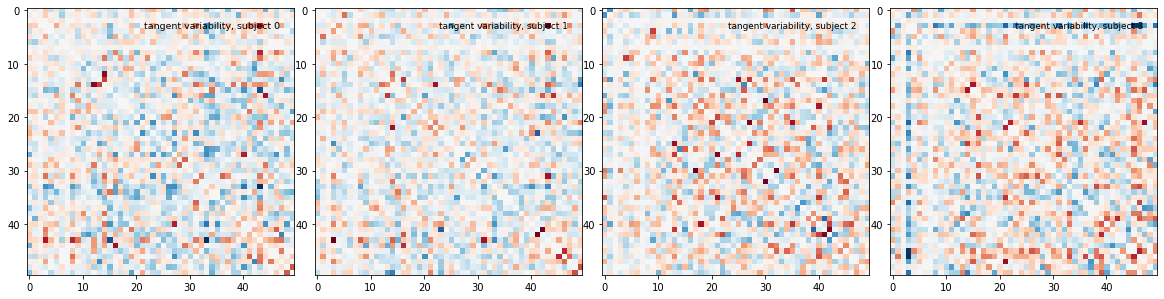

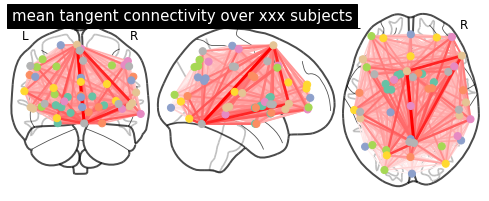

In [391]:
#Tangent matrices
#tangent correlation

tangent_measure = ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(mdd_subjects)
plot_matrices(tangent_matrices[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure.mean_, coordinates,
    title='mean tangent connectivity over xxx subjects')

ValueError: Each subject must be 2D numpy.ndarray.
 You provided [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]

In [99]:
correlation_matrices

array([[[1.        , 0.98285574, 0.94849523, ..., 0.91864403,
         0.89470925, 0.90754638],
        [0.98285574, 1.        , 0.94174218, ..., 0.91259603,
         0.89770428, 0.90739381],
        [0.94849523, 0.94174218, 1.        , ..., 0.96287194,
         0.92786681, 0.94737801],
        ...,
        [0.91864403, 0.91259603, 0.96287194, ..., 1.        ,
         0.93818583, 0.95076469],
        [0.89470925, 0.89770428, 0.92786681, ..., 0.93818583,
         1.        , 0.98349067],
        [0.90754638, 0.90739381, 0.94737801, ..., 0.95076469,
         0.98349067, 1.        ]],

       [[1.        , 0.98324957, 0.93964261, ..., 0.89214163,
         0.83037434, 0.83094529],
        [0.98324957, 1.        , 0.91745796, ..., 0.86922555,
         0.81253639, 0.81085265],
        [0.93964261, 0.91745796, 1.        , ..., 0.94240058,
         0.89252913, 0.88417184],
        ...,
        [0.89214163, 0.86922555, 0.94240058, ..., 1.        ,
         0.92495419, 0.94251703],
        [0.8